In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('./X.csv',index_col=0)
target = pd.read_csv('./clean_data_years.csv', index_col=0)
df2 = pd.read_csv('./final_clean_df.csv',index_col=0)

In [4]:
df2['lyrics']=df2['lyrics'].str.replace('nigga','n___')

In [5]:
df2['lyrics']=df2['lyrics'].str.replace('fuck','f___')

In [6]:
df2['lyrics']=df2['lyrics'].str.replace('bitch','b___')

In [7]:
df2['lyrics']=df2['lyrics'].str.replace('shit','s___')

In [8]:
df['target'] = target['hot100']

In [9]:
df.head()

,00,000,007,01,02,03,04,05,06,07,...,zoovier,zoowap,zorro,zu,zucchi,zuckerberg,zulu,zy,ándale,date_year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1999.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2009.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2002.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2009.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1999.0


In [10]:
years = df['date_year'].unique()
years.sort()
years

array([1977., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995.,
       1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017., 2018.])

In [11]:
df_sum = df.sum()

In [12]:
df_sum.sort_values(ascending=False)

date_year     34601213.0
nigga            87825.0
fuck             37112.0
bitch            36186.0
shit             35864.0
yeah             29435.0
cause            28022.0
man              23244.0
make             22933.0
say              20985.0
time             20560.0
love             19328.0
money            19299.0
come             18434.0
wanna            17628.0
want             17398.0
tell             15679.0
baby             15234.0
look             14927.0
way              14860.0
life             14730.0
yo               14698.0
girl             14636.0
need             13914.0
feel             13409.0
real             12919.0
thk              12714.0
hit              12474.0
gotta            12232.0
day              11991.0
                 ...    
volleyball           5.0
clicker              5.0
co2                  5.0
puffer               5.0
xerox                5.0
kenzo                5.0
automatics           5.0
cnabon               5.0
kernel               5.0


In [13]:
hits_pre200 = sum(df[df['date_year'] < 2000 ]['target'])/len(df[df['date_year'] < 2000])
hits_post200 = sum(df[df['date_year'] >= 2000 ]['target'])/len(df[df['date_year'] >= 2000])

In [14]:
print(hits_pre200,hits_post200)

0.06709385601206182 0.04480274442538593


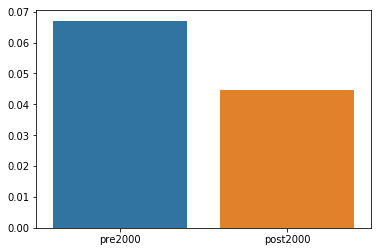

In [15]:
sns.barplot(['pre2000','post2000'],[hits_pre200,hits_post200])

In [16]:
hits_year = [(sum(df[df['date_year'] == year]['target']))/len(df[df['date_year'] == year]) for year in years]

Text(0.5, 1.0, 'Year vs. Number of Hits')

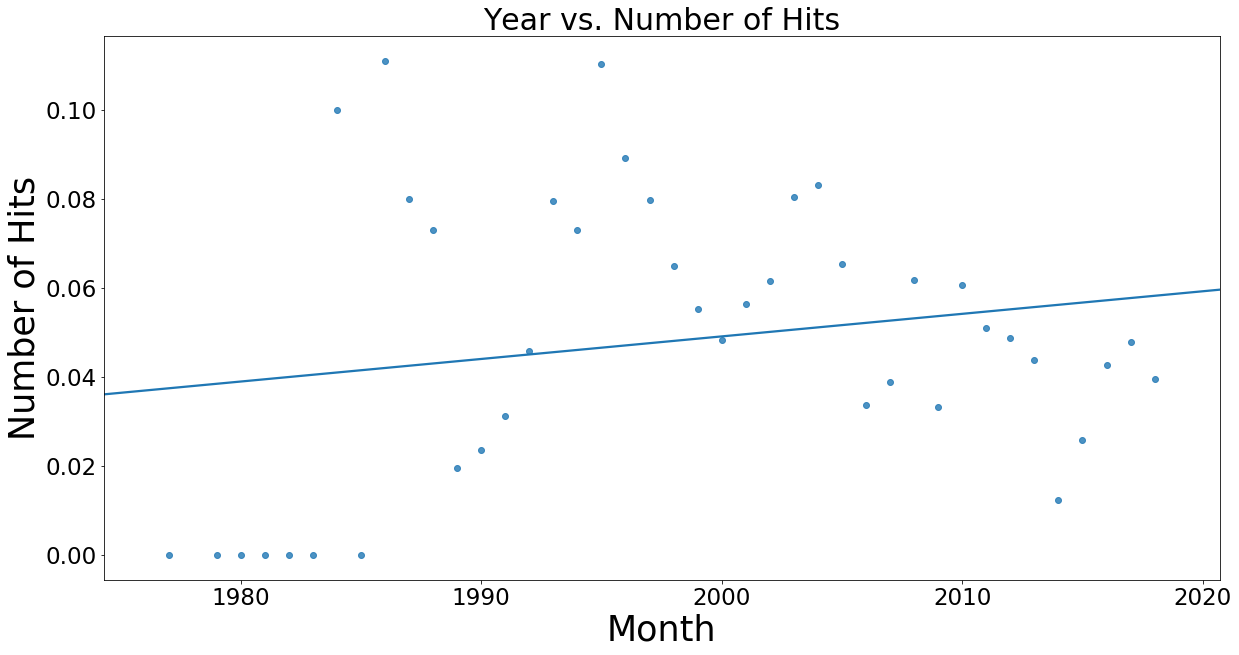

In [17]:
plt.figure(figsize=(20,10))
sns.regplot(x=years, y=hits_year, ci=None)
plt.xlabel('Month', size=35)
plt.xticks(size=23)
plt.ylabel('Number of Hits', size=35)
plt.yticks(size=23)
plt.title("Year vs. Number of Hits", fontsize=30)

In [18]:
n_ = [len(df[(df['date_year'] == year) & (df['nigga']>1)])/len(df[df['date_year']==year]) for year in years]

In [19]:
f_ = [len(df[(df['date_year'] == year) & (df['fuck']>1)])/len(df[df['date_year']==year]) for year in years]

In [20]:
b_ = [len(df[(df['date_year'] == year) & (df['bitch']>1)])/len(df[df['date_year']==year]) for year in years]

In [21]:
s_ = [len(df[(df['date_year'] == year) & (df['shit']>1)])/len(df[df['date_year']==year]) for year in years]

Text(0.5, 1.0, 'Year vs. Songs with Curse Words')

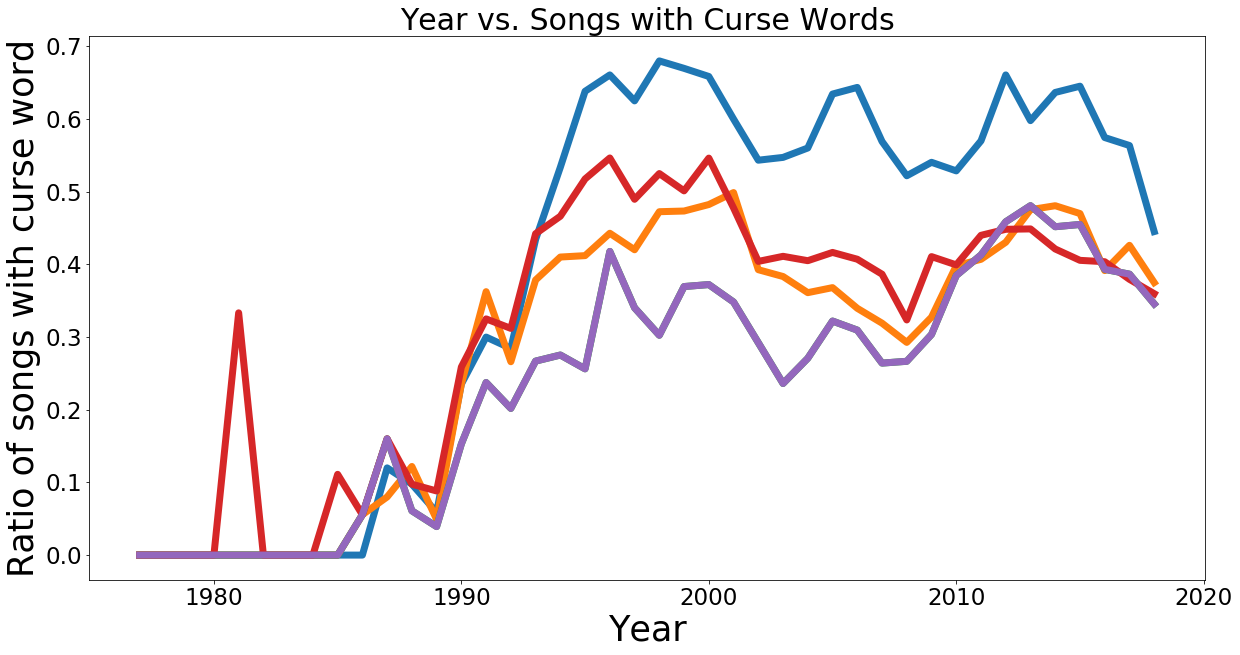

In [22]:
plt.figure(figsize=(20,10))

sns.lineplot(x=years, y=n_, palette = 'rainbow_r', ci=None, lw=7)

sns.lineplot(x=years, y=f_, palette = 'rainbow_r', ci=None, lw=7)

sns.lineplot(x=years, y=b_, palette = 'rainbow_r', ci=None, lw=7)

sns.lineplot(x=years, y=s_, palette = 'rainbow_r', ci=None, lw=7)

sns.lineplot(x=years, y=b_, palette = 'rainbow_r', ci=None, lw=7)
plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel('Ratio of songs with curse word', size=35)
plt.yticks(size=23)
plt.title("Year vs. Songs with Curse Words", fontsize=30)


In [23]:
len(df[(df['target'] != 1) & (df['money']>1)].date_year.unique())

37

In [24]:
m_=[len(df[(df['date_year'] == year)&(df['money']>1)&(df['target']!=1)])/len(df[(df['date_year']==year)&(df['target']!=1)]) for year in years]

In [25]:
n_=[len(df[(df['date_year'] == year)&(df['nigga']>1)&(df['target']!=1)])/len(df[(df['date_year']==year)&(df['target']!=1)]) for year in years]

In [26]:
f_=[len(df[(df['date_year'] == year) & (df['fuck']>1)&(df['target']!=1)])/len(df[(df['date_year']==year)&(df['target']!=1)]) for year in years]

In [27]:
b_=[len(df[(df['date_year'] == year)&(df['bitch']>1)&(df['target']!=1)])/len(df[(df['date_year']==year)&(df['target']!=1)]) for year in years]

In [28]:
s_=[len(df[(df['date_year'] == year) & (df['shit']>1)&(df['target']!=1)])/len(df[(df['date_year']==year)&(df['target']!=1)]) for year in years]

Text(0.5, 1.0, 'Year vs. Songs with Curse Words in Non-hits')

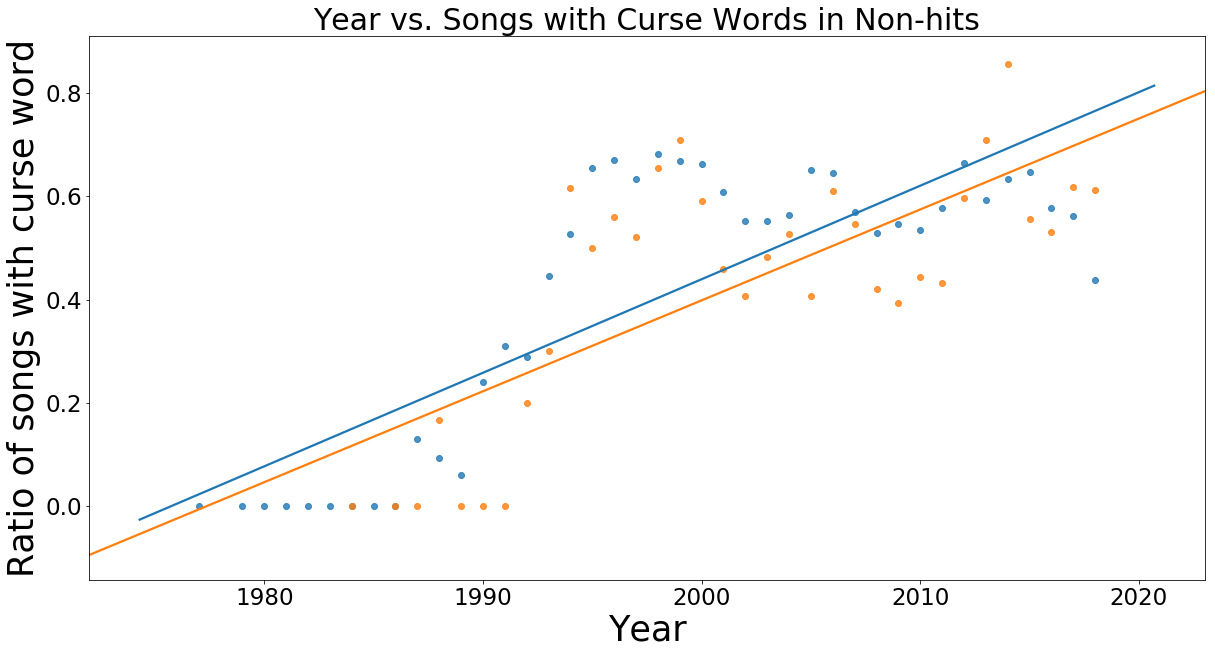

In [208]:
plt.figure(figsize=(20,10))

sns.regplot(x=years, y=n_, ci=None)
sns.regplot(x=years_hits, y=n1_, ci=None)

#sns.lineplot(x=years, y=f_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years, y=b_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years, y=s_, palette = 'rainbow_r', ci=None, lw=7)

plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel('Ratio of songs with curse word', size=35)
plt.yticks(size=23)
plt.title("Year vs. Songs with Curse Words in Non-hits", fontsize=30)


In [30]:
years_hits = []
for year in years:
    if len(df[(df['date_year'] == year)&(df['target']==1)]) != 0:
        years_hits.append(year)
    else:
        pass
        

In [31]:
m1_=[len(df[(df['date_year'] == year)&(df['money']>1)&(df['target']==1)])/len(df[(df['date_year']==year)&(df['target']==1)]) for year in years_hits]

In [32]:
n1_=[len(df[(df['date_year'] == year)&(df['nigga']>1)&(df['target']==1)])/len(df[(df['date_year']==year)&(df['target']==1)]) for year in years_hits]

In [33]:
f1_=[len(df[(df['date_year'] == year) & (df['fuck']>1)&(df['target']==1)])/len(df[(df['date_year']==year)&(df['target']==1)]) for year in years_hits]

In [34]:
b1_=[len(df[(df['date_year'] == year)&(df['bitch']>1)&(df['target']==1)])/len(df[(df['date_year']==year)&(df['target']==1)]) for year in years_hits]

In [35]:
s1_=[len(df[(df['date_year'] == year) & (df['shit']>1)&(df['target']==1)])/len(df[(df['date_year']==year)&(df['target']==1)]) for year in years_hits]

In [36]:
len(m_)

41

Text(0.5, 1.0, "Year vs. Songs with word 'money'")

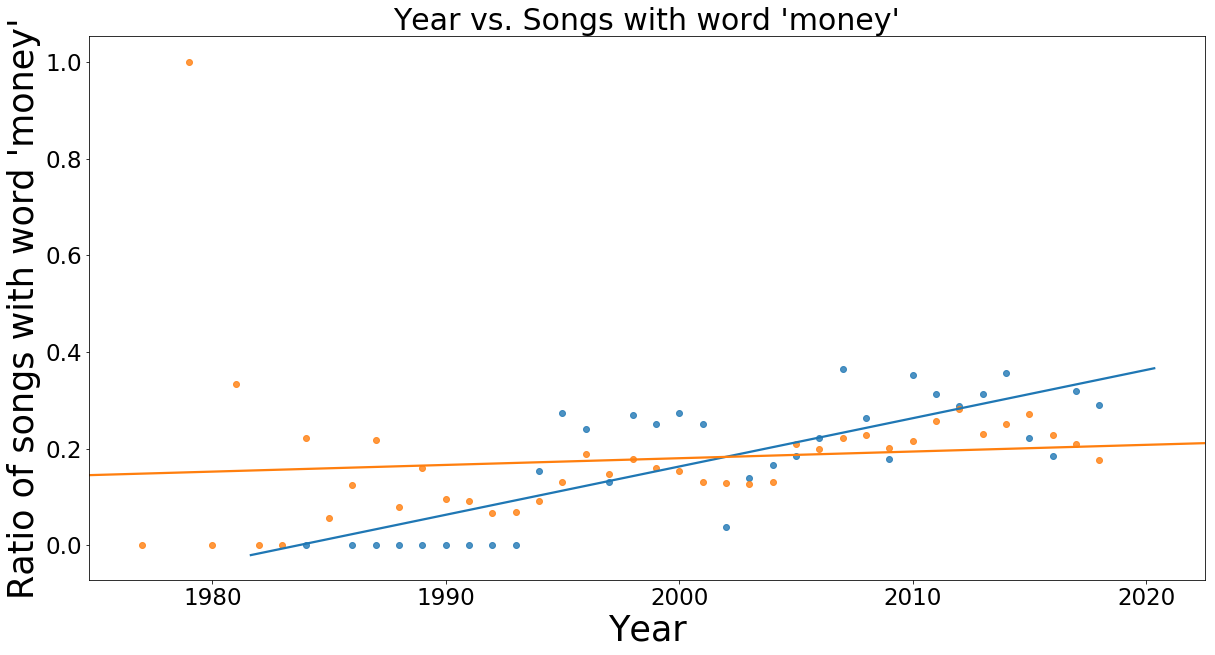

In [37]:
plt.figure(figsize=(20,10))

sns.regplot(x=years_hits, y=m1_, ci=None)

sns.regplot(x=years, y=m_, ci=None)

#sns.lineplot(x=years_hits, y=f1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=b1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=s1_, palette = 'rainbow_r', ci=None, lw=7)

plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("Ratio of songs with word 'money'", size=35)
plt.yticks(size=23)
plt.title("Year vs. Songs with word 'money'", fontsize=30)

In [216]:
girl_ = [len(df[(df['date_year'] == year) & (df['girl']>1)&(df['target']!=1)])/len(df[(df['date_year']==year)&(df['target']!=1)]) for year in years]

In [217]:
girl1_ = [len(df[(df['date_year'] == year) & (df['girl']>1)&(df['target']==1)])/len(df[(df['date_year']==year)&(df['target']==1)]) for year in years_hits]

In [210]:
gang1_ = [len(df[(df['date_year'] == year) & (df['gang']>1)&(df['target']==1)])/len(df[(df['date_year']==year)&(df['target']==1)]) for year in years_hits]

In [211]:
gang_ = [len(df[(df['date_year'] == year) & (df['gang']>1)&(df['target']!=1)])/len(df[(df['date_year']==year)&(df['target']!=1)]) for year in years]

Text(0.5, 1.0, "Year vs. Songs with word 'gang'")

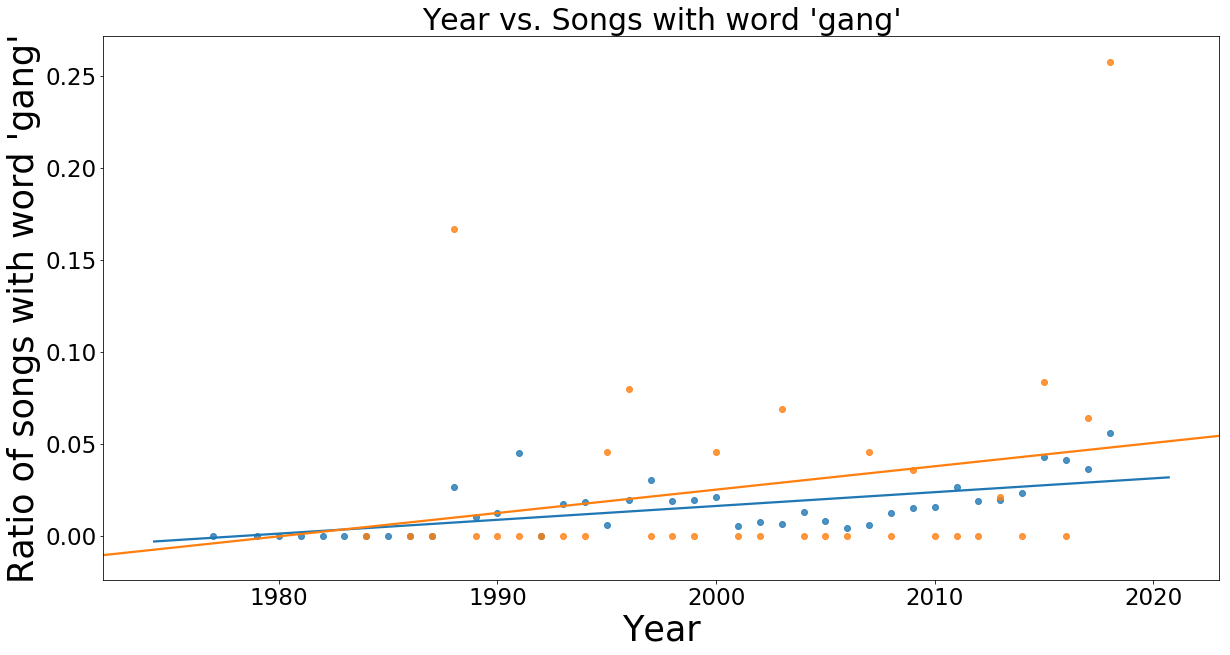

In [219]:
plt.figure(figsize=(20,10))

sns.regplot(x=years, y=gang_, ci=None)

sns.regplot(x=years_hits, y=gang1_, ci=None)

#sns.lineplot(x=years_hits, y=f1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=b1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=s1_, palette = 'rainbow_r', ci=None, lw=7)

plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("Ratio of songs with word 'gang'", size=35)
plt.yticks(size=23)
plt.title("Year vs. Songs with word 'gang'", fontsize=30)

Text(0.5, 1.0, "Year vs. Songs with word 'girl'")

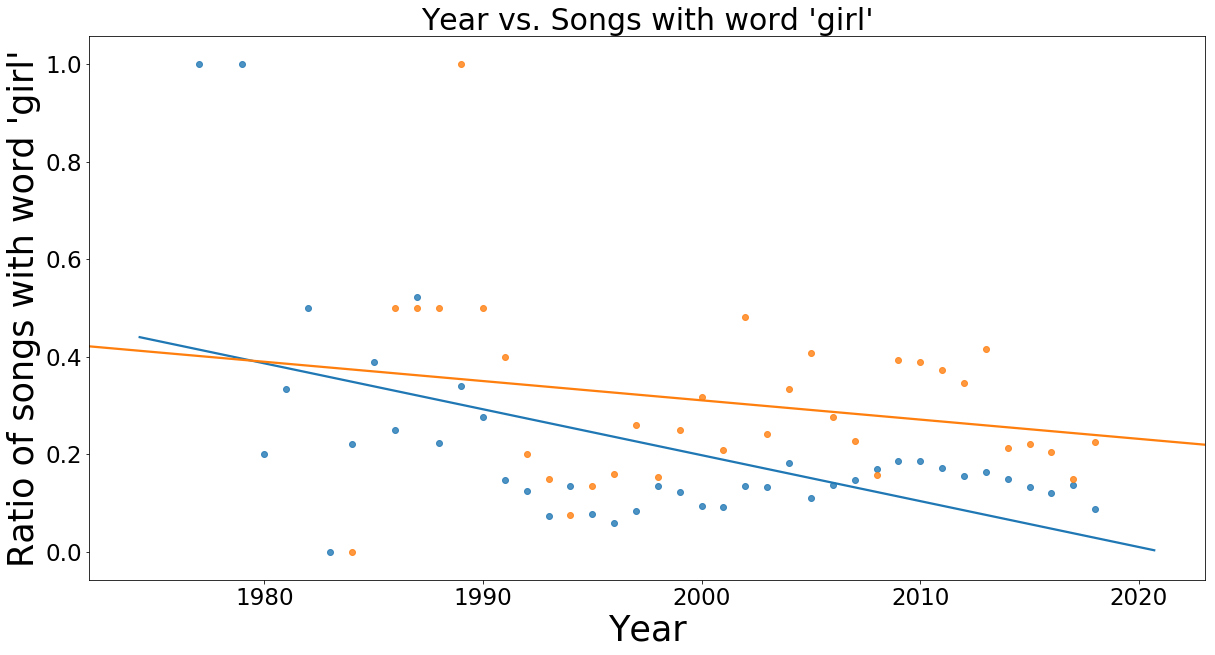

In [218]:
plt.figure(figsize=(20,10))

sns.regplot(x=years, y=girl_, ci=None)

sns.regplot(x=years_hits, y=girl1_, ci=None)

#sns.lineplot(x=years_hits, y=f1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=b1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=s1_, palette = 'rainbow_r', ci=None, lw=7)

plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("Ratio of songs with word 'girl'", size=35)
plt.yticks(size=23)
plt.title("Year vs. Songs with word 'girl'", fontsize=30)

In [214]:
girl_ = [len(df[(df['date_year'] == year) & (df['girl']>1)&(df['target']!=1)])/len(df[(df['date_year']==year)&(df['target']!=1)]) for year in years]

In [215]:
 from wordcloud import WordCloud

In [43]:
WordCloud

wordcloud.wordcloud.WordCloud

In [44]:
df2.dropna(inplace=True)

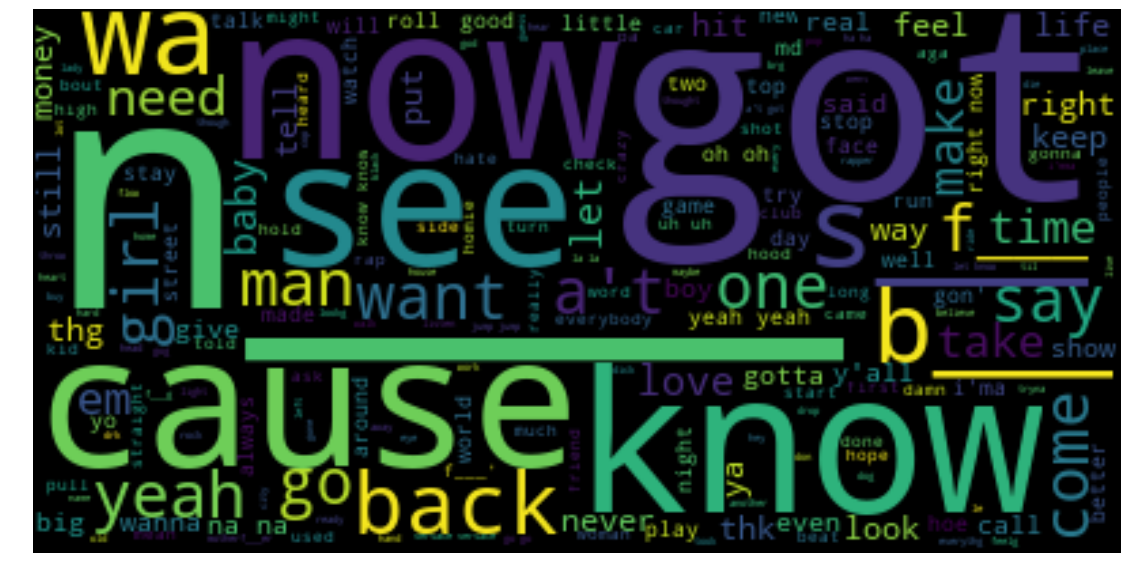

In [45]:
# Start with one review:
plt.figure(figsize=(20,10))
text = " ".join(song for song in df2[df2['hot100']==1].lyrics)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

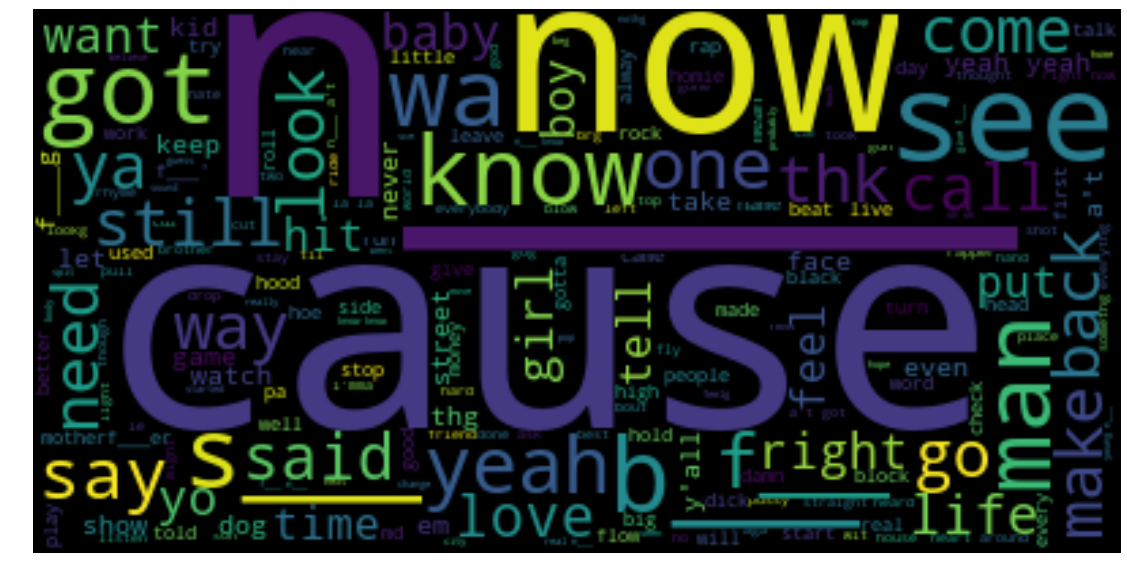

In [46]:
# Start with one review:
plt.figure(figsize=(20,10))
text = " ".join(song for song in df2[df2['hot100']==0].lyrics)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [47]:
top_words_non_hits = list(df.groupby('target').
     mean().T.sort_values(0, ascending=False).head(20).index)

top_words_jots = list(df.groupby('target').
     mean().T.sort_values(1, ascending=False).head(20).index)

In [48]:
top_words_overlap = [song for song in top_words_non_hits if song in top_words_jots]

And we could conduct a hypothesis test on this.

$H_0$: The subreddits for shoes and socks have the same mean frequency for word $x$.

$H_0$: The subreddits for shoes and socks have a different mean frequency for word $x$.

We'll set our alpha at .05

In [49]:
from scipy.stats import ttest_ind

In [50]:
ttest_dict = {}
for word in top_words_overlap:
    ttest_dict[word] = ttest_ind(df[df['target']==1][word], 
         df[df['target']==0][word])

In [51]:
ttest_dict

{'date_year': Ttest_indResult(statistic=-6.423661970082948, pvalue=1.3651897462283125e-10),
 'nigga': Ttest_indResult(statistic=-3.9395967300025707, pvalue=8.194046416484716e-05),
 'fuck': Ttest_indResult(statistic=-2.480968729778902, pvalue=0.013112058050149792),
 'bitch': Ttest_indResult(statistic=-1.5520977815246417, pvalue=0.12065719958983429),
 'shit': Ttest_indResult(statistic=-0.8485205444214158, pvalue=0.3961599264848912),
 'yeah': Ttest_indResult(statistic=5.412888652329886, pvalue=6.284530656868614e-08),
 'cause': Ttest_indResult(statistic=6.451423266229414, pvalue=1.1375677359295666e-10),
 'man': Ttest_indResult(statistic=0.7420678014846682, pvalue=0.45805637464618587),
 'make': Ttest_indResult(statistic=5.352506447773459, pvalue=8.785450170111546e-08),
 'say': Ttest_indResult(statistic=5.883741192000417, pvalue=4.0852764938067775e-09),
 'time': Ttest_indResult(statistic=2.0829544923397183, pvalue=0.03727008450964983),
 'money': Ttest_indResult(statistic=0.8132049729566632, 

In [52]:
versace = [len(df[(df['date_year'] == year) & (df['versace']>1)])/len(df[df['date_year']==year]) for year in years]
gucci = [len(df[(df['date_year'] == year) & (df['gucci']>1)])/len(df[df['date_year']==year]) for year in years]
prada = [len(df[(df['date_year'] == year) & (df['prada']>1)])/len(df[df['date_year']==year]) for year in years]
louis_vuitton = [len(df[(df['date_year'] == year) & (df['vuitton']>1)])/len(df[df['date_year']==year]) for year in years]


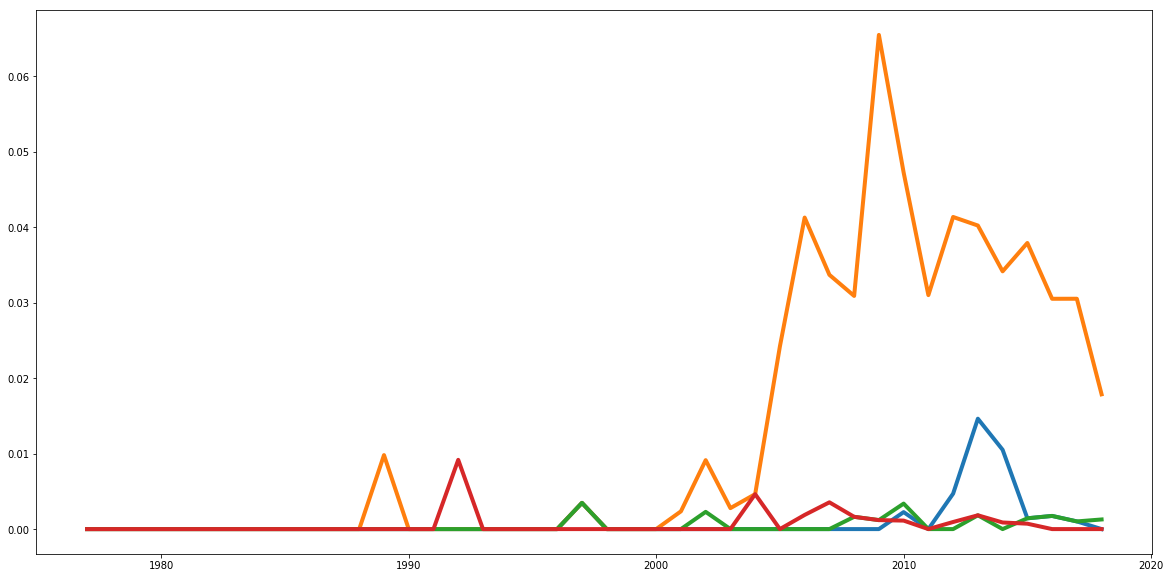

In [53]:
plt.figure(figsize=(20,10))

sns.lineplot(x=years, y=versace, palette = 'rainbow_r', ci=None, lw=4)
sns.lineplot(x=years, y=gucci, palette = 'rainbow_r', ci=None, lw=4)
sns.lineplot(x=years, y=prada, palette = 'rainbow_r', ci=None, lw=4)
sns.lineplot(x=years, y=louis_vuitton, palette = 'rainbow_r', ci=None, lw=4)


In [54]:
df_hit = df[df['target'] == 1]

In [55]:
#plt.figure(figsize=(20,10))
#sns.lineplot(x=years, y=money, palette = 'rainbow_r', ci=None, lw=4)

In [56]:
dic={}
for artist in df2['artist'].unique():
    if '$$' in artist:
        artist = artist.replace('$$', 'SSSSS')
    dic[artist] = sum(df2[df2['artist'] == artist]['hot100'])


In [262]:
hits = dic.values()

In [277]:
x = sorted(dic, key = dic.__getitem__,  reverse=True)

In [281]:
y = sorted(dic.values(), reverse=True)

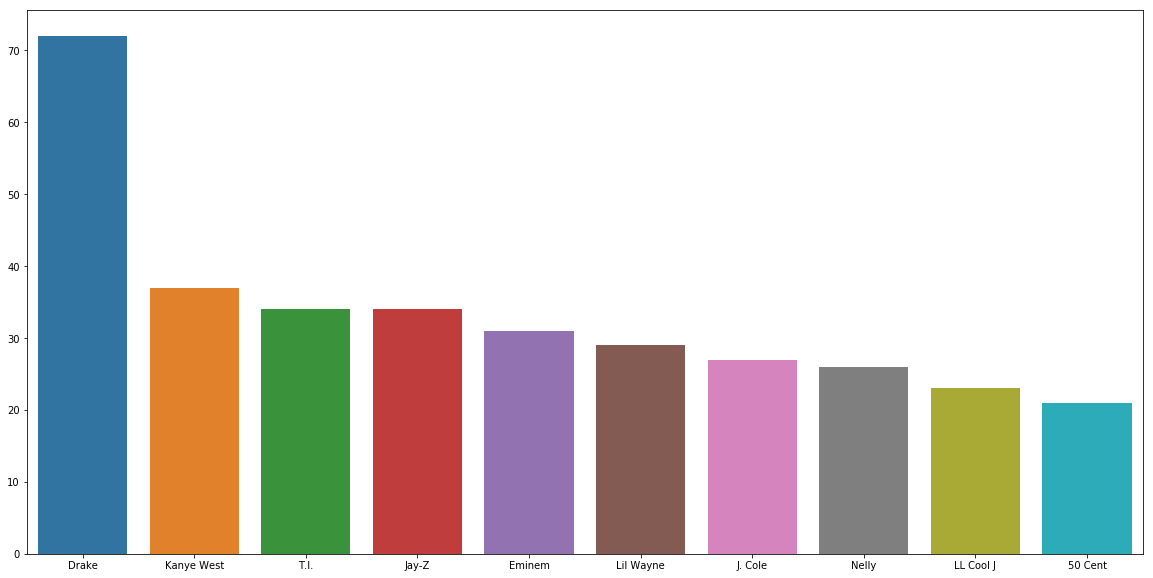

In [283]:
plt.figure(figsize=(20,10))

sns.barplot(x = x[0:10],y= y[0:10])

In [59]:
if type(df.loc[4,'lyrics']) == np.number:
    print('yes')

In [60]:
def length_of_song(df):
    lengths = []
    dates = []
    for i in range(len(df)):
        lengths.append(len(df.loc[i,'lyrics']))
        dates.append(df.loc[i,'year'])
    return lengths, dates

In [61]:
def clean_df(df):
    for i in range(len(df)):
        if (type(df.loc[i,'lyrics']) == np.float):
            df.drop(index=i, inplace=True)
    return df

In [62]:
df2.reset_index(inplace=True)

In [63]:
df3 = clean_df(df2)

In [64]:
df3.shape

(17220, 7)

In [65]:
df3.reset_index(inplace=True)

In [66]:
df3.drop('index',axis=1,inplace=True)

In [67]:
y_length, dates = length_of_song(df3)

In [68]:
len(y_length)

17220

In [69]:
length_v_years = pd.DataFrame(data = [y_length,dates]).T

In [70]:
length_v_years.sort_values(1).head()

,0,1
10350,626.0,1977.0
15919,2939.0,1979.0
15922,1039.0,1980.0
15929,3116.0,1980.0
15928,2120.0,1980.0


In [71]:
def year_averages(length_v_years):  
    averages = []
    for year in length_v_years[1].unique():
        averages.append(np.median(length_v_years[length_v_years[1] == year][0]))
    return averages
    

In [72]:
average_length = length_v_years[length_v_years[0]>500]

In [226]:
length_v_years.head()

,0,1
0,2170.0,1999.0
1,2346.0,2009.0
2,2560.0,2002.0
3,2287.0,2009.0
4,431.0,1999.0


In [231]:
mask = length_v_years[0] > 100

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Length of Song')

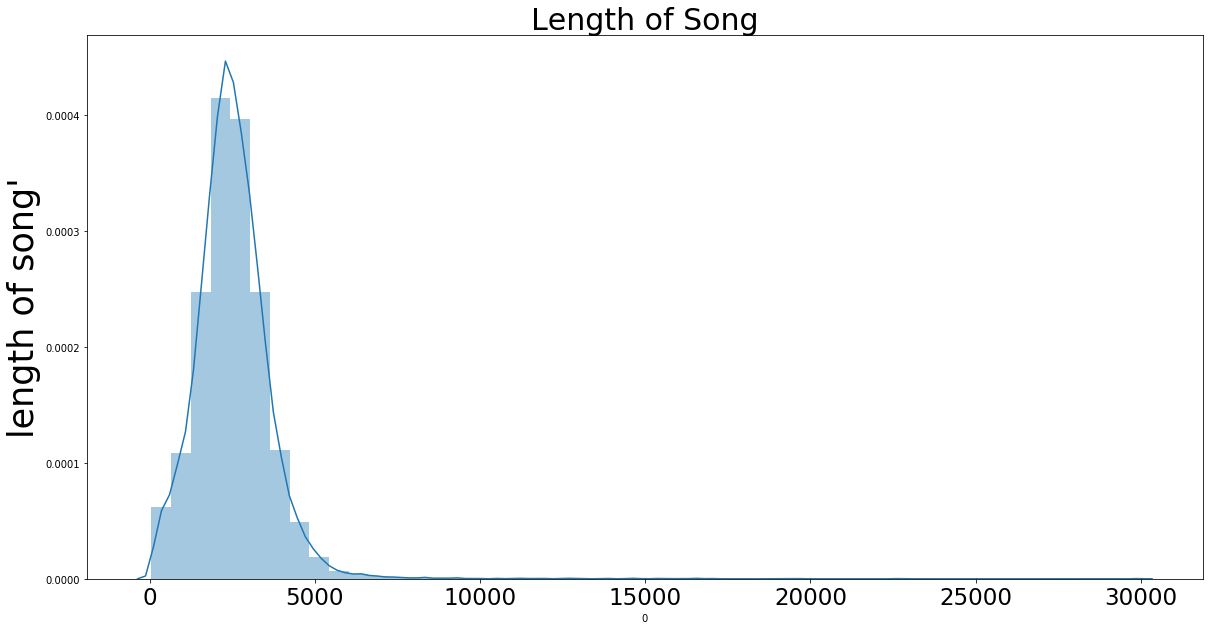

In [229]:
plt.figure(figsize=(20,10))

sns.distplot(length_v_years[mask][0])

#sns.lineplot(x=years_hits, y=f1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=b1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=s1_, palette = 'rainbow_r', ci=None, lw=7)

#plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("length of song'", size=35)
#plt.yticks(size=23)
plt.title("Length of Song", fontsize=30)

Text(0.5, 1.0, 'Time vs. Length of Song')

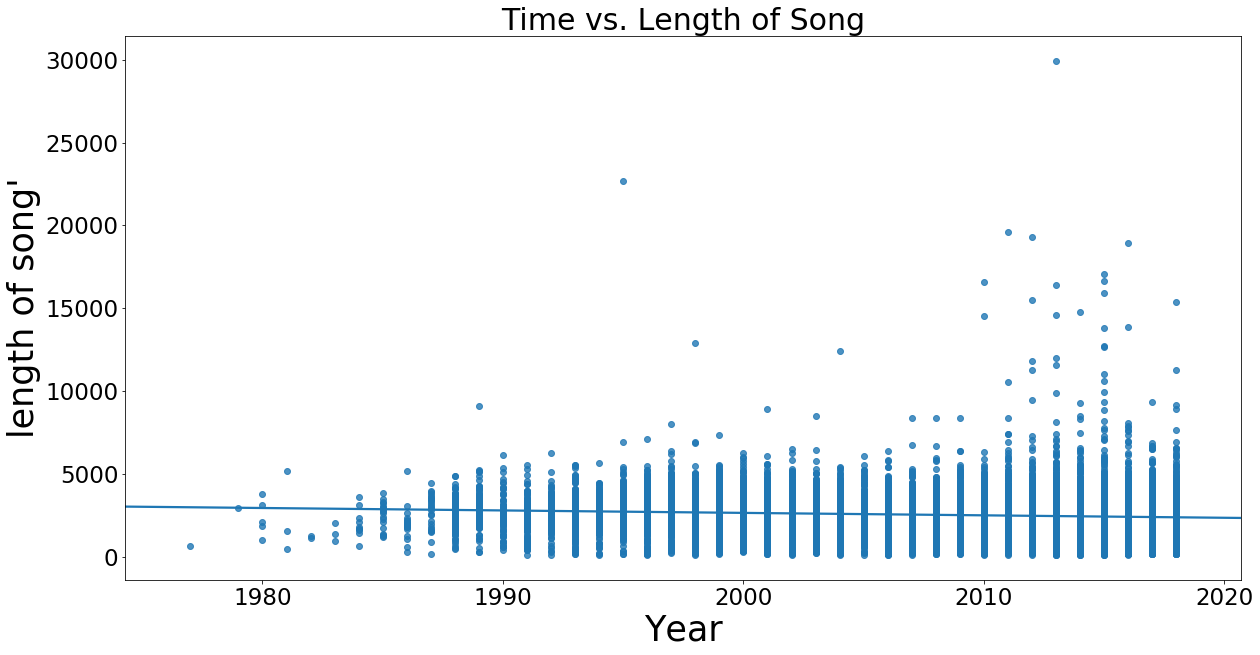

In [235]:
plt.figure(figsize=(20,10))

#sns.regplot(x=average_length[1].unique(), y=year_averages(average_length), ci=None)

sns.regplot(x=length_v_years[mask][1], y=length_v_years[mask][0], ci=None)

#sns.lineplot(x=years_hits, y=b1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=s1_, palette = 'rainbow_r', ci=None, lw=7)

plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("length of song'", size=35)
plt.yticks(size=23)
plt.title("Time vs. Length of Song", fontsize=30)

In [154]:
df['artist'] = df2['artist']

In [155]:
def artist_words(df, artist):
    masked = df[df.artist == artist].copy()
    masked.drop(['artist', 'date_year'], 1, inplace = True)
    masked_sum = masked.sum()
    return masked_sum[masked_sum > 0].index.shape[0]    

In [156]:
def collapse(df):
    unique_count = []
    for artist in df['artist'].unique():
        unique_count.append(artist_words(df, artist))
    return unique_count

In [157]:
%time x = collapse(df)

CPU times: user 8.38 s, sys: 2.76 s, total: 11.1 s
Wall time: 11.2 s


In [158]:
unique_words = pd.DataFrame(x,df['artist'].unique())

In [159]:
unique_words.reset_index(inplace=True)

In [160]:
unique_words.head()

,index,0
0,MF Doom,4199
1,XXXTentacion,2976
2,A$AP Rocky,4128
3,Chance the Rapper,3515
4,2 Chainz,4941


In [161]:
unique_words.head()

,index,0
0,MF Doom,4199
1,XXXTentacion,2976
2,A$AP Rocky,4128
3,Chance the Rapper,3515
4,2 Chainz,4941


In [162]:
for i in range(len(unique_words)):
    unique_words.loc[i,'num_songs'] = len(df[df['artist']==unique_words.loc[i,'index']])

In [166]:
for i in range(len(unique_words)):
    if unique_words.loc[i,0] > 15:
        unique_words.loc[i,'unique_per_song'] = unique_words.loc[i,0]/unique_words.loc[i,'num_songs']

In [167]:
#unique_words['unique_per_song'] = unique_words.apply(lambda x: len(df[df['artist'] == x['index']]),1)

In [171]:
mask = (unique_words['num_songs'] > 15)

In [173]:
unique_words.dropna(inplace=True)

In [175]:
unique_words[mask].sort_values('unique_per_song',ascending=False)

,index,0,num_songs,unique_per_song
74,Bad Meets Evil,3021,19.0,159.000000
118,Coolio,1613,16.0,100.812500
137,Erick Sermon,1966,20.0,98.300000
16,Slick Rick,2294,25.0,91.760000
139,Kool Moe Dee,1821,20.0,91.050000
101,Immortal Technique,3778,42.0,89.952381
126,Mack 10,1696,20.0,84.800000
114,Shaquille O'Neal,1673,20.0,83.650000
108,Slaughterhouse,5358,67.0,79.970149
30,Heavy D,1559,20.0,77.950000


In [90]:
# def clean_df(df):
#     for i in range(len(df)):
#         if (type(df.loc[i,'0']) == np.float):
#             df.drop(index=i, inplace=True)
#     return df

In [181]:
df_unique_sum = pd.DataFrame(df_unique_sum)

In [186]:
unique_words['year'] = df['date_year']

In [194]:
unique_words.head()

,index,0,num_songs,unique_per_song,year
0,MF Doom,4199,62.0,67.725806,1999.0
1,XXXTentacion,2976,168.0,17.714286,2009.0
2,A$AP Rocky,4128,99.0,41.696970,2002.0
3,Chance the Rapper,3515,79.0,44.493671,2009.0
4,2 Chainz,4941,155.0,31.877419,1999.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Time vs. unique words per song')

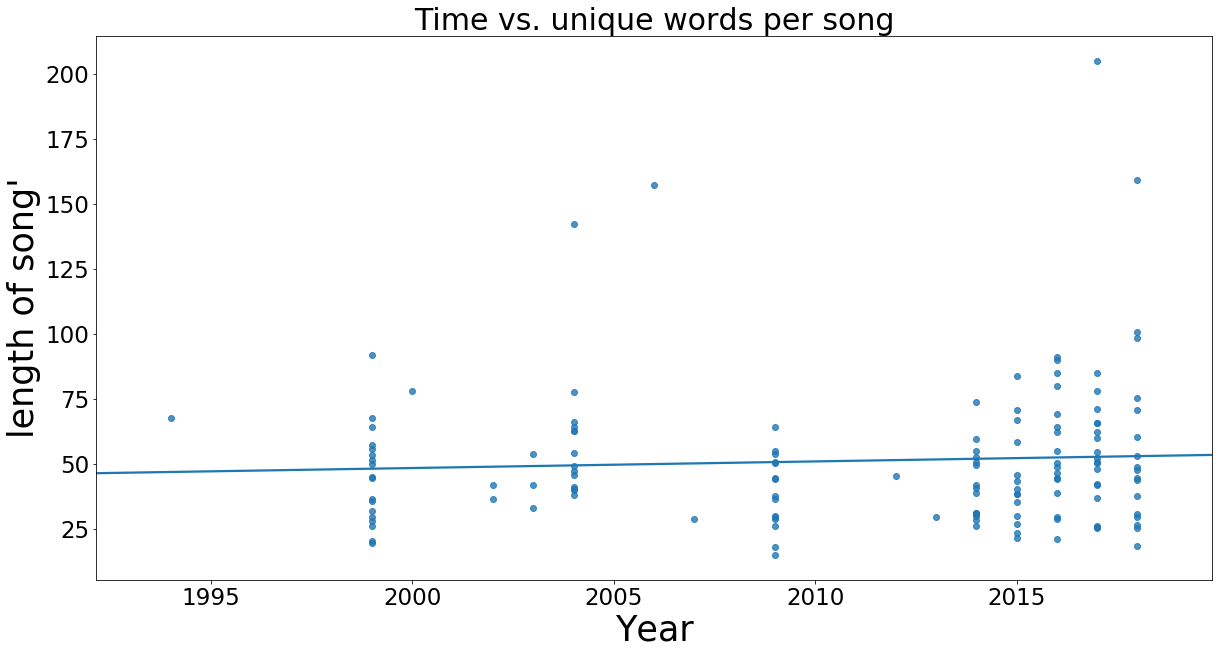

In [256]:
plt.figure(figsize=(20,10))

sns.regplot(x=unique_words[mask]['year'], y=unique_words[mask]['unique_per_song'], ci=None)

#sns.lineplot(x=years_hits, y=f1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=b1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=s1_, palette = 'rainbow_r', ci=None, lw=7)

plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("length of song'", size=35)
plt.yticks(size=23)
plt.title("Time vs. unique words per song", fontsize=30)

Text(0.5, 1.0, 'Unique Words ')

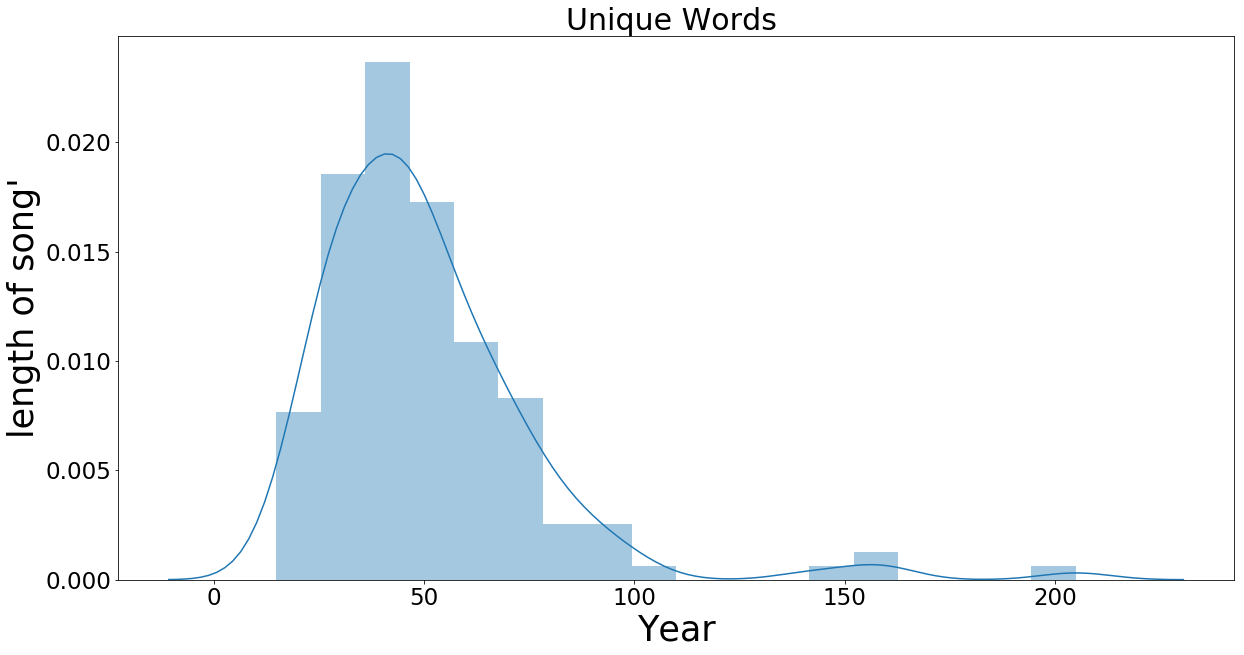

In [241]:
plt.figure(figsize=(20,10))

sns.distplot(unique_words['unique_per_song'])

#sns.lineplot(x=years_hits, y=f1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=b1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=s1_, palette = 'rainbow_r', ci=None, lw=7)

plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("length of song'", size=35)
plt.yticks(size=23)
plt.title("Unique Words ", fontsize=30)

In [244]:
df_bool = df > 0

In [248]:
df_bool_sum = df_bool.T.sum()

Text(0.5, 1.0, 'Unique Words ')

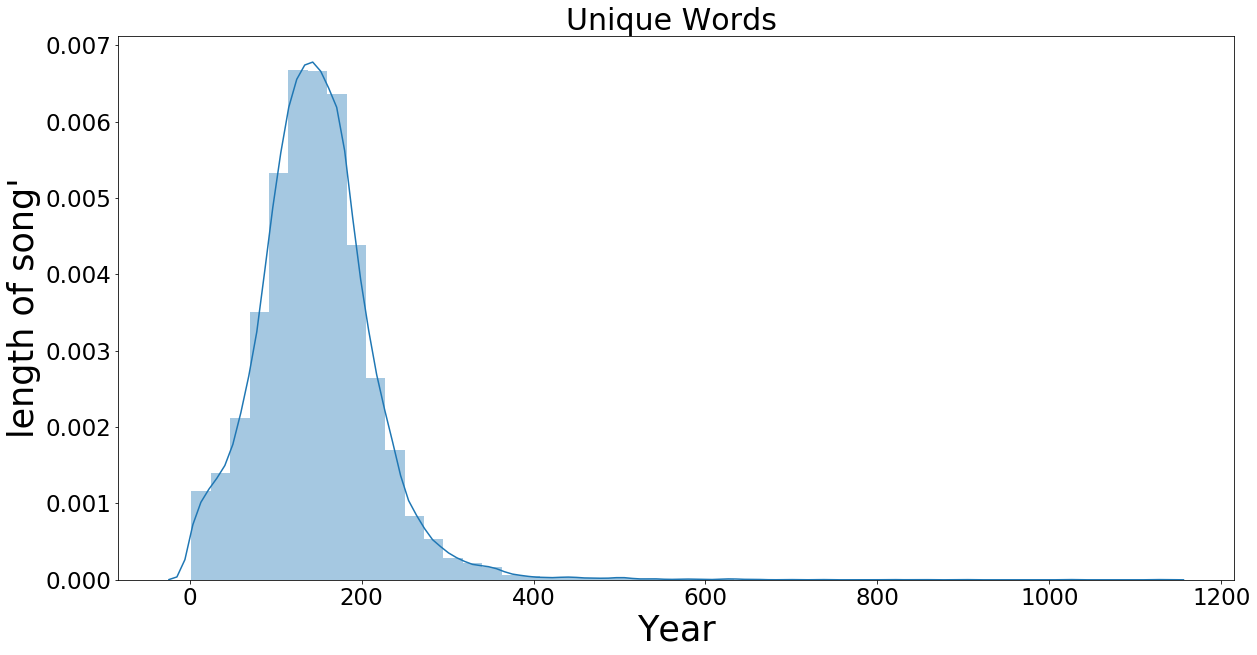

In [250]:
plt.figure(figsize=(20,10))

sns.distplot(df_bool_sum)

#sns.lineplot(x=years_hits, y=f1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=b1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=s1_, palette = 'rainbow_r', ci=None, lw=7)

plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("length of song'", size=35)
plt.yticks(size=23)
plt.title("Unique Words ", fontsize=30)

Text(0.5, 1.0, 'Time vs. unique words per song')

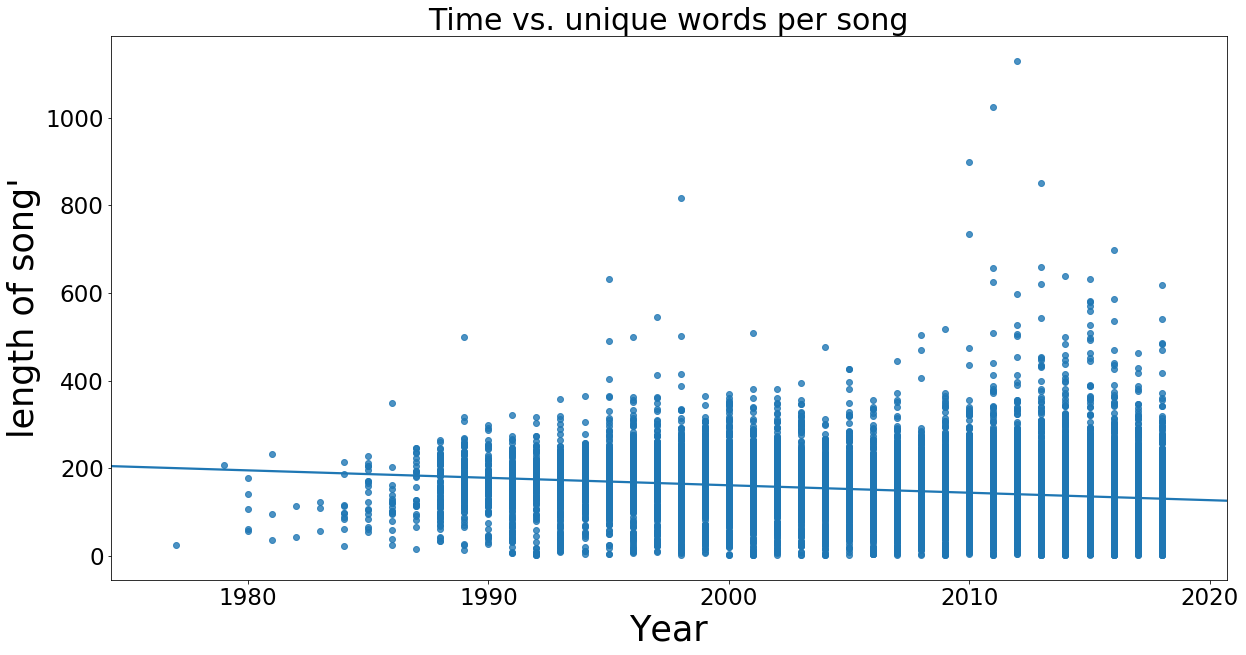

In [257]:
plt.figure(figsize=(20,10))

sns.regplot(x=df['date_year'], y=df_bool_sum, ci=None)

#sns.lineplot(x=years_hits, y=f1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=b1_, palette = 'rainbow_r', ci=None, lw=7)

#sns.lineplot(x=years_hits, y=s1_, palette = 'rainbow_r', ci=None, lw=7)

plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("length of song'", size=35)
plt.yticks(size=23)
plt.title("Time vs. unique words per song", fontsize=30)